# Bitcoin Price Prediction

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# preparing the data for analysis

In [110]:
df = pd.read_csv('bitcoin_price.csv')

In [111]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [112]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [113]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [114]:
df['Date'] = pd.to_datetime(df['Date'])

In [115]:
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
df = df.sort_index()

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [13]:
# re-sample data

In [14]:
data = df.copy()

In [15]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [16]:
# understand trend of Close price by resampling data in various ways

Text(0, 0.5, 'Daily Bitcoin price')

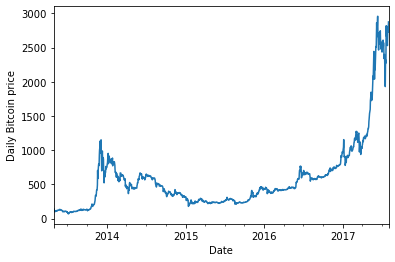

In [17]:
data['Close'].plot()
plt.ylabel('Daily Bitcoin price')

In [18]:
data2 = data['Close']

In [19]:
data2.head()

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

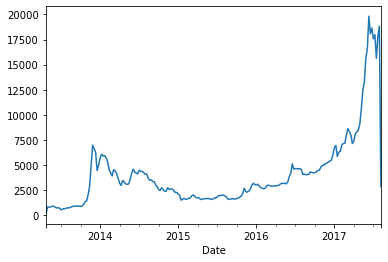

In [20]:
# resample sum weekly
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

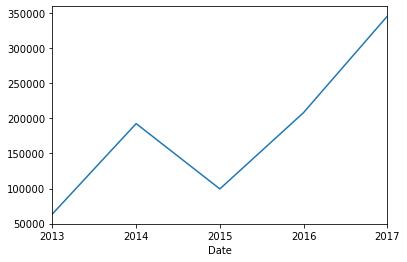

In [21]:
# resample sum yearly
data2.resample('Y').sum().plot()

<AxesSubplot:xlabel='Date'>

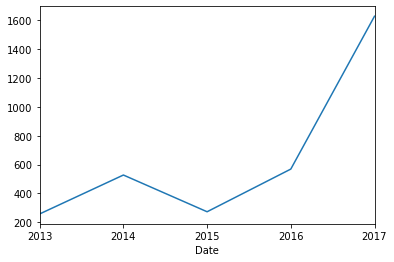

In [22]:
# resample average/mean closing price yearly
data2.resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

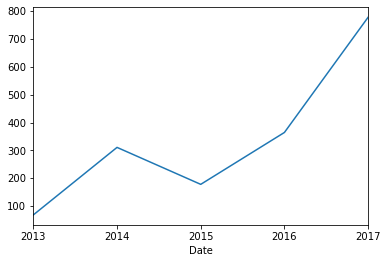

In [23]:
# resample minimum closing price yearly
data2.resample('Y').min().plot()

<AxesSubplot:xlabel='Date'>

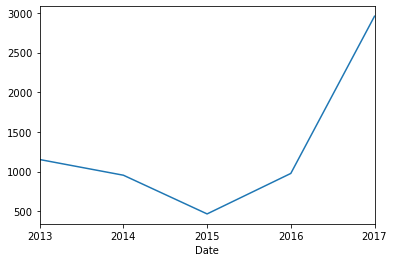

In [24]:
# resample maximum closing price yearly
data2.resample('Y').max().plot()

In [25]:
# Analysing average/mean weekly closing price

In [26]:
data2.index.dayofweek

Int64Index([0, 6, 5, 4, 3, 2, 1, 0, 6, 5,
            ...
            1, 0, 6, 5, 4, 3, 2, 1, 0, 6],
           dtype='int64', name='Date', length=1556)

In [27]:
weekday = data.groupby(data2.index.dayofweek)['Close'].mean()
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

In [28]:
weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 

<AxesSubplot:>

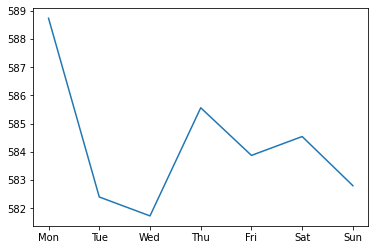

In [29]:
weekday.plot()

In [30]:
# Analysing average/mean closing price by day

In [31]:
days = data2.index.dayofyear
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
            127, 126, 125, 124, 123, 122, 121, 120, 119, 118],
           dtype='int64', name='Date', length=1556)

In [32]:
data.groupby(days)['Close'].mean()

Date
1      629.5775
2      643.1525
3      643.4125
4      677.8800
5      663.3350
         ...   
362    600.1375
363    616.6550
364    616.7475
365    616.5025
366    963.7400
Name: Close, Length: 366, dtype: float64

Text(0, 0.5, 'Average closing price')

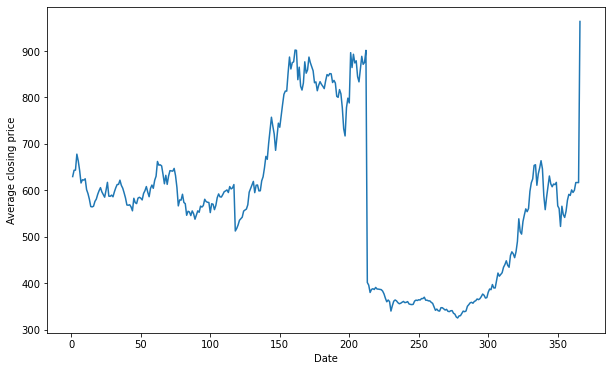

In [33]:
plt.figure(figsize=(10,6))
data.groupby(days)['Close'].mean().plot()
plt.ylabel('Average closing price')

In [34]:
# Analysing average/mean closing price by quarter

In [35]:
data2.index.quarter

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=1556)

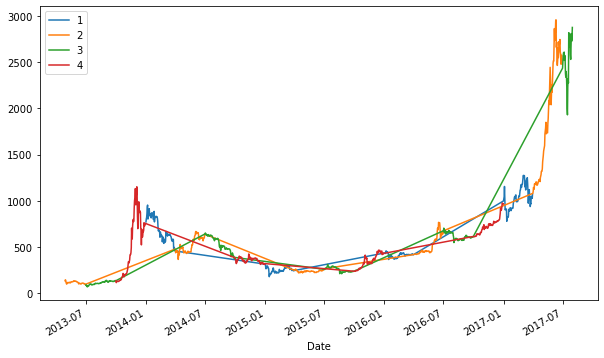

In [36]:
plt.figure(figsize=(10,6))
data.groupby(data2.index.quarter)['Close'].plot()
plt.legend()

In [37]:
# Analysing trend of closing price - weekdays and weekends

In [38]:
data['dayofweek'] = data.index.dayofweek

In [39]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3


In [40]:
def assign_labels(feature):
    if feature <5:
        return 'weekday'
    else:
        return 'weekend'

In [41]:
data['dayoftheweek'] = data['dayofweek'].apply(assign_labels)

In [42]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,dayoftheweek
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0,weekday
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6,weekend
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5,weekend
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4,weekday
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3,weekday


<AxesSubplot:title={'center':'weekday'}, xlabel='Date'>

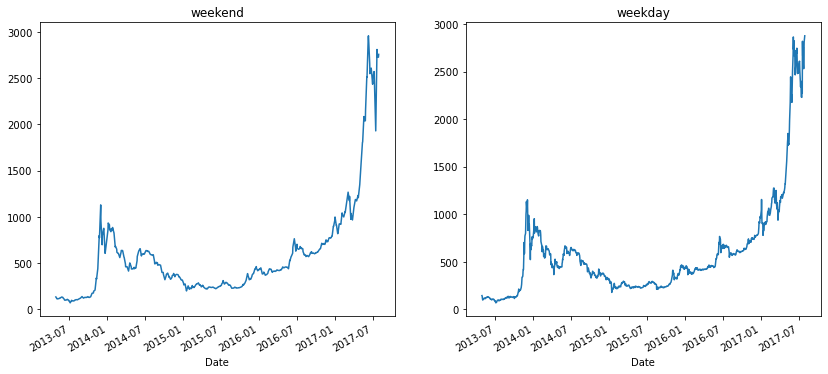

In [43]:
# 1 row, 2 columns
fig, ax = plt.subplots(1,2, figsize=(14,6))
data[data['dayoftheweek']=='weekend']['Close'].plot(ax=ax[0], title='weekend')
data[data['dayoftheweek']=='weekday']['Close'].plot(ax=ax[1], title='weekday')
# very similar charts. Slight difference - not so much downward trend on weekday 2017-07 compared to weekend equivalent

In [44]:
# Build baseline model - prediction using naive model

In [45]:
# create new column with shifted(by 1) values
data['prediction_naive'] = data['Close'].shift(1)

In [46]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,dayoftheweek,prediction_naive
Date,,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0,weekday,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6,weekend,2875.34
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5,weekend,2757.18
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4,weekday,2726.45
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3,weekday,2809.01


<AxesSubplot:xlabel='Date'>

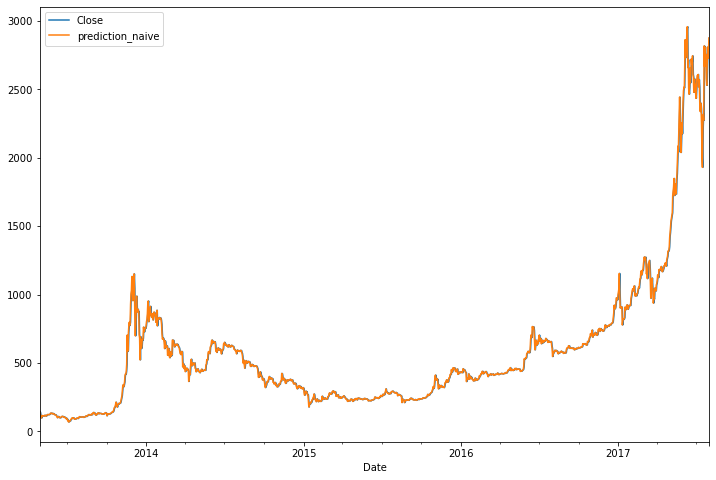

In [47]:
# difference between prediciton and actual values
data[['Close', 'prediction_naive']].plot(figsize=(12,8))
# prediction_naive basically overlaps actual values

In [48]:
# to evaluate how the model is performing...
from sklearn.metrics import mean_squared_error

In [49]:
# [1:] to remove the first NaN value
np.sqrt(mean_squared_error(data['Close'][1:], data['prediction_naive'][1:]))

37.23363264835875

In [50]:
#37.23363264835875 is the error value of the naive model - plus or minus difference between prediction and actual value
# but... previous data is not a true reflection of future data

# examine if there is seasonality or noise in the data

<AxesSubplot:xlabel='Date'>

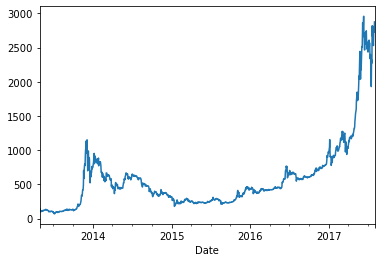

In [51]:
data['Close'].plot()

In [52]:
mean = data['Close'].rolling(window = 7).mean()
std = data['Close'].rolling(window = 7).std()

In [53]:
# first 6 values are missing values
mean

Date
2017-07-31           NaN
2017-07-30           NaN
2017-07-29           NaN
2017-07-28           NaN
2017-07-27           NaN
                 ...    
2013-05-02    109.820000
2013-05-01    110.308571
2013-04-30    114.237143
2013-04-29    118.842857
2013-04-28    121.457143
Name: Close, Length: 1556, dtype: float64

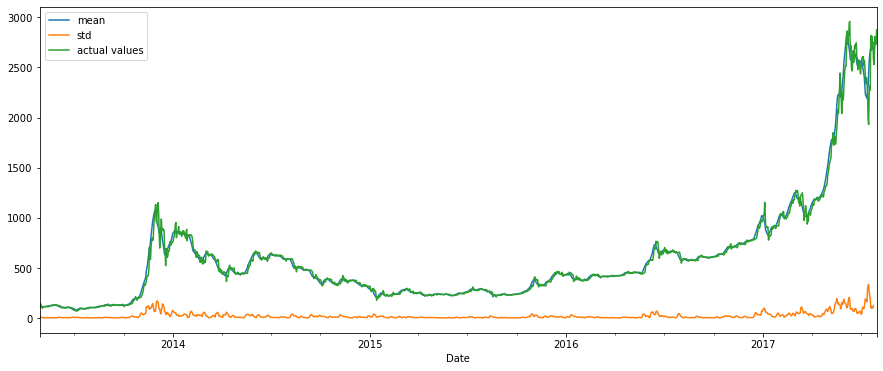

In [54]:
plt.figure(figsize= (15,6))
mean.plot(label = 'mean')
std.plot(label = 'std')
data['Close'].plot(label = 'actual values')
plt.legend()
# rolling mean is not stationary and it changes with time - need to eliminate trend and seasonality

In [55]:
# Statistical tests to detect whether there is a seasonal or stationarity trend
# Augumented Dickie Fuller test - p value to define stationarity
from statsmodels.tsa.stattools import adfuller

In [56]:
# check for missing values
data['Close'].isnull().sum()

0

In [57]:
adfuller(data['Close'])

(-4.47798943194197,
 0.00021545351558762137,
 24,
 1531,
 {'1%': -3.4346284441307184,
  '5%': -2.863429668579316,
  '10%': -2.5677760318409732},
 14821.384786923289)

In [58]:
# p-value (second number) is less than 0.05 - strong evidence against null hypothesis, so data is stationary

In [59]:
# make the results more user-friendly to view
result = adfuller(data['Close'])
labels = ['ADF Test Statistics', 'P-value', 'Lags', 'Number of observations']
for value, label in zip(result, labels):
    print('{} : {}'.format(label, value))

ADF Test Statistics : -4.47798943194197
P-value : 0.00021545351558762137
Lags : 24
Number of observations : 1531


In [60]:
def test_for_stationarity(feature):
    mean = data[feature].rolling(window = 7).mean()
    std = data[feature].rolling(window = 7).std()
    
    plt.figure(figsize= (15,6))
    mean.plot(label = 'mean')
    std.plot(label = 'std')
    data[feature].plot(label = 'actual values')
    plt.legend()
    
    result = adfuller(data[feature].dropna())
    labels = ['ADF Test Statistics', 'P-value', 'Lags', 'Number of observations']
    for value, label in zip(result, labels):
        print('{} : {}'.format(label, value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis & reject & data is stationary')
    else:
        print('Weak evidence against null hypothesis & reject & data is non-stationary')

ADF Test Statistics : -4.47798943194197
P-value : 0.00021545351558762137
Lags : 24
Number of observations : 1531
Strong evidence against null hypothesis & reject & data is stationary


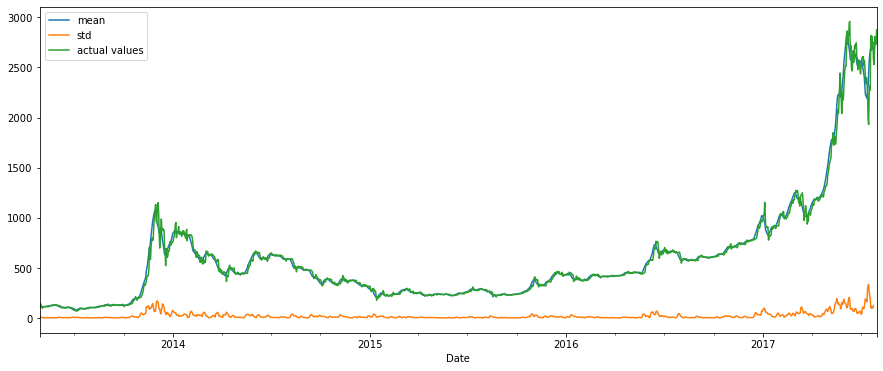

In [61]:
test_for_stationarity('Close')

In [62]:
# eliminate trend from the data and smoothening series (moving average) to remove seasonality

In [63]:
log_data = np.log(data['Close'])

<AxesSubplot:xlabel='Date'>

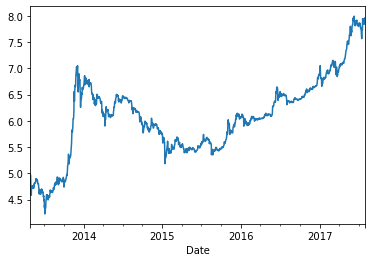

In [64]:
np.log(data['Close']).plot()

In [65]:
rolling_avg = log_data - log_data.shift(7)

In [66]:
rolling_average = log_data.rolling(window=7).mean()

<function matplotlib.pyplot.legend(*args, **kwargs)>

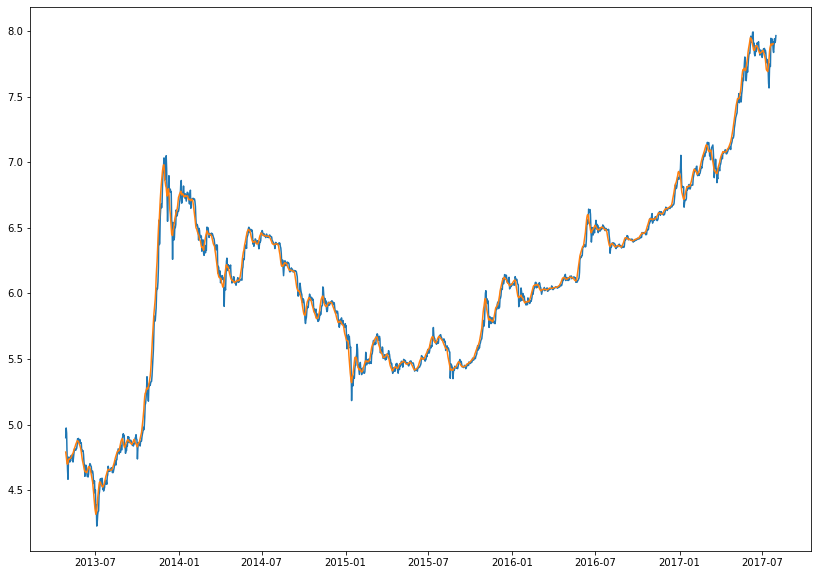

In [67]:
plt.figure(figsize=(14,10))
plt.plot(log_data, label = 'Log transformed')
plt.plot(rolling_average, label = 'Rolling average')
plt.legend

In [68]:
lr_diff = log_data - rolling_average

In [69]:
# very small differences between the log data and the rolling average
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

In [70]:
data['lr_diff'] = lr_diff

ADF Test Statistics : -7.188887202324541
P-value : 2.5340955586102206e-10
Lags : 22
Number of observations : 1527
Strong evidence against null hypothesis & reject & data is stationary


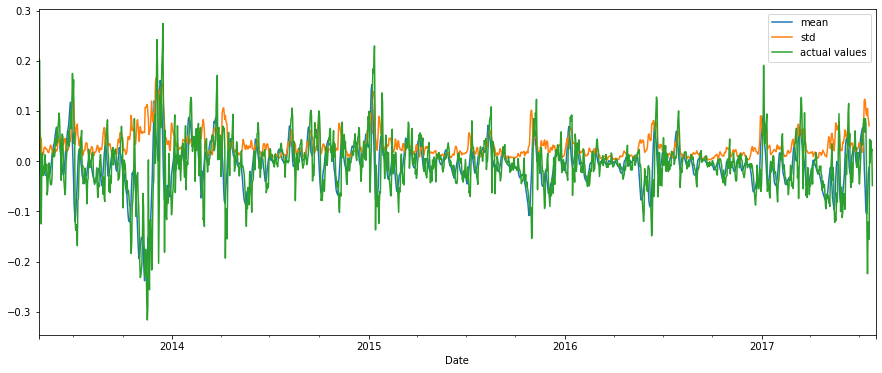

In [71]:
test_for_stationarity('lr_diff')

In [72]:
log_ts = log_data - log_data.shift(7)

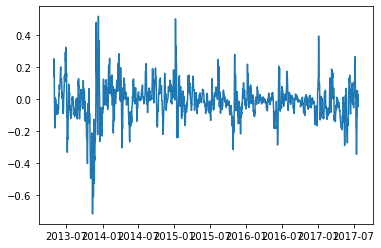

In [73]:
plt.plot(log_ts)

In [74]:
data['log_ts'] = log_ts

ADF Test Statistics : -6.511722596316715
P-value : 1.0961860829580395e-08
Lags : 23
Number of observations : 1525
Strong evidence against null hypothesis & reject & data is stationary


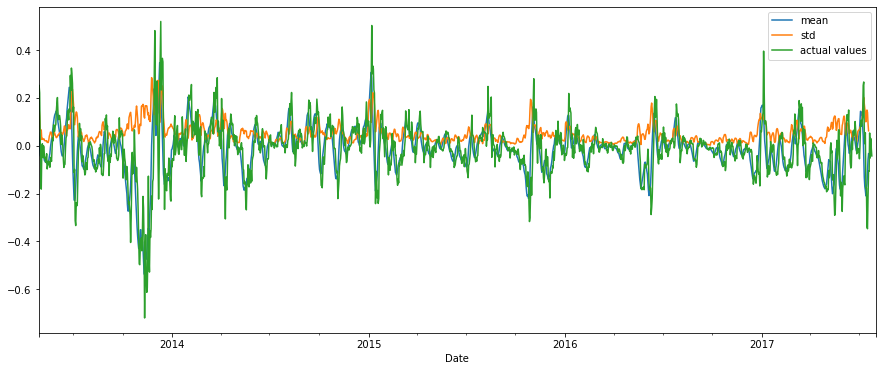

In [75]:
# time series is stationary with 99% confidence
test_for_stationarity('log_ts')

In [76]:
from prophet import Prophet

In [77]:
model = Prophet()

In [78]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,dayoftheweek,prediction_naive,lr_diff,log_ts
Date,,,,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0,weekday,NaN,NaN,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6,weekend,2875.34,NaN,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5,weekend,2757.18,NaN,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4,weekday,2726.45,NaN,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3,weekday,2809.01,NaN,NaN


In [79]:
df = data[['Close']]

In [80]:
df.head()

,Close
Date,
2017-07-31,2875.34
2017-07-30,2757.18
2017-07-29,2726.45
2017-07-28,2809.01
2017-07-27,2671.78


In [81]:
df = df.reset_index()

In [82]:
df.columns = ['ds','y']

In [83]:
df.head()

,ds,y
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78


In [84]:
m = model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future = m.make_future_dataframe(periods=500, freq='D')

In [86]:
future.head()

,ds
0,2013-04-28
1,2013-04-29
2,2013-04-30
3,2013-05-01
4,2013-05-02


In [87]:
data.shape

(1556, 11)

In [88]:
future.shape

(2056, 1)

In [89]:
forecast = m.predict(future)

In [90]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,78.013914,-212.301369,60.426156,78.013914,78.013914,-154.730349,-154.730349,-154.730349,-2.728693,-2.728693,-2.728693,-152.001656,-152.001656,-152.001656,0.0,0.0,0.0,-76.716435
1,2013-04-29,76.042304,-213.458908,78.540025,76.042304,76.042304,-144.214701,-144.214701,-144.214701,1.480335,1.480335,1.480335,-145.695036,-145.695036,-145.695036,0.0,0.0,0.0,-68.172397
2,2013-04-30,74.070694,-214.278406,66.147802,74.070694,74.070694,-136.941412,-136.941412,-136.941412,2.455150,2.455150,2.455150,-139.396562,-139.396562,-139.396562,0.0,0.0,0.0,-62.870719
3,2013-05-01,72.099083,-201.109696,66.054196,72.099083,72.099083,-133.029361,-133.029361,-133.029361,0.053955,0.053955,0.053955,-133.083316,-133.083316,-133.083316,0.0,0.0,0.0,-60.930278
4,2013-05-02,70.127473,-209.517942,86.415534,70.127473,70.127473,-124.550376,-124.550376,-124.550376,2.178101,2.178101,2.178101,-126.728477,-126.728477,-126.728477,0.0,0.0,0.0,-54.422903


In [91]:
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail(10)
# yhat lower and upper are the bounds of the prediction

,ds,yhat,yhat_lower,yhat_upper
2046,2018-12-04,5587.349564,3151.235067,8194.803142
2047,2018-12-05,5586.897199,3151.235193,8217.036714
2048,2018-12-06,5590.384867,3128.449917,8219.718278
2049,2018-12-07,5587.862758,3069.136337,8304.368404
2050,2018-12-08,5587.249932,3132.196570,8316.411533
2051,2018-12-09,5586.850155,3051.270555,8262.065381
2052,2018-12-10,5590.897150,3057.738305,8239.245835
2053,2018-12-11,5591.548155,3102.617232,8336.600525
2054,2018-12-12,5588.748898,3119.810047,8266.986501
2055,2018-12-13,5590.484927,3090.924520,8249.331338


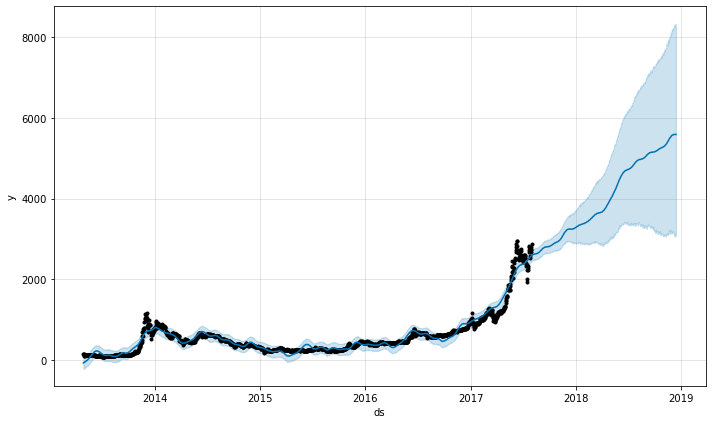

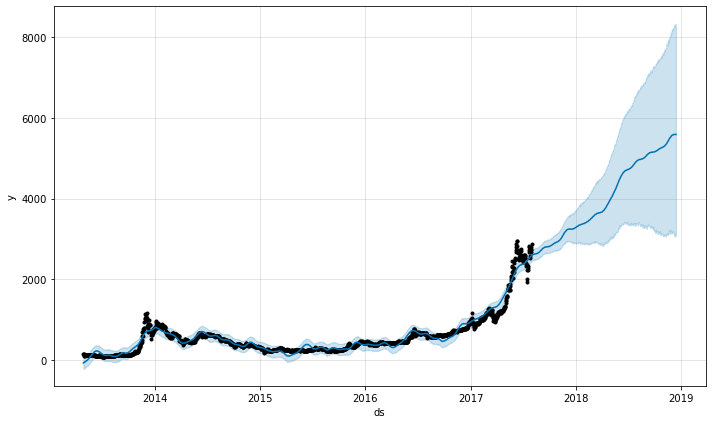

In [92]:
model.plot(forecast)

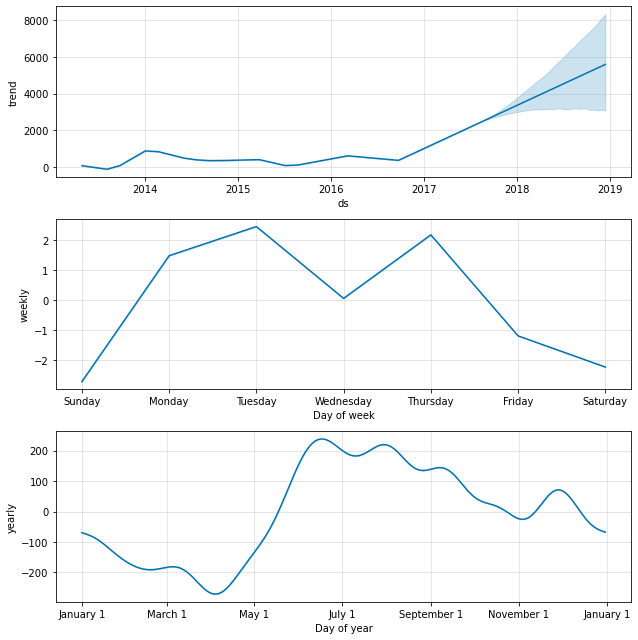

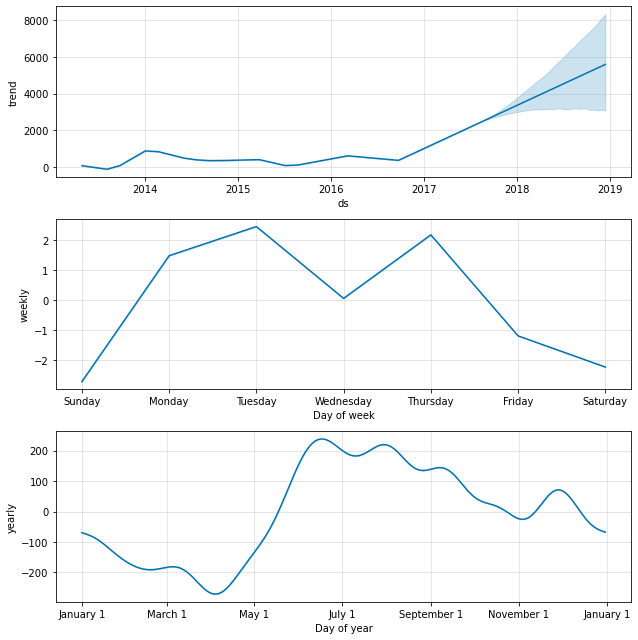

In [93]:
model.plot_components(forecast)

In [96]:
# cross validation on time series data
from prophet.diagnostics import cross_validation

In [97]:
df.shape

(1556, 2)

In [98]:
df_cv = cross_validation(model, horizon='365 days', period='180 days',initial='1095 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2016-07-31 00:00:00 and 2016-07-31 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
df_cv.shape

(365, 6)

In [100]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,687.246416,606.484756,767.635736,606.27,2016-07-31
1,2016-08-02,688.461819,609.215671,774.242877,547.47,2016-07-31
2,2016-08-03,687.787785,605.766620,766.733791,566.36,2016-07-31
3,2016-08-04,688.579766,610.899654,766.651534,578.29,2016-07-31
4,2016-08-05,688.732000,609.861589,766.261628,575.04,2016-07-31


In [102]:
from prophet.plot import plot_cross_validation_metric

C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


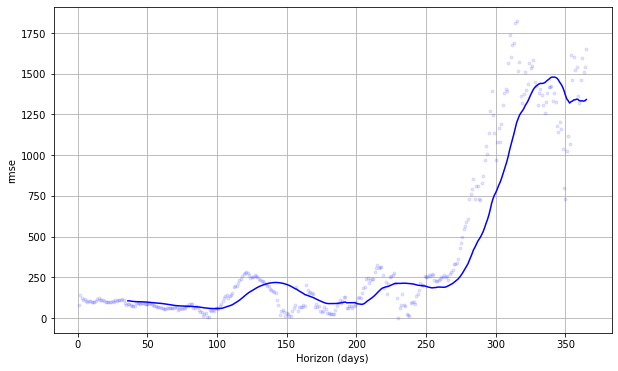

In [104]:
# root mean square error
fig = plot_cross_validation_metric(df_cv, metric='rmse')

C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


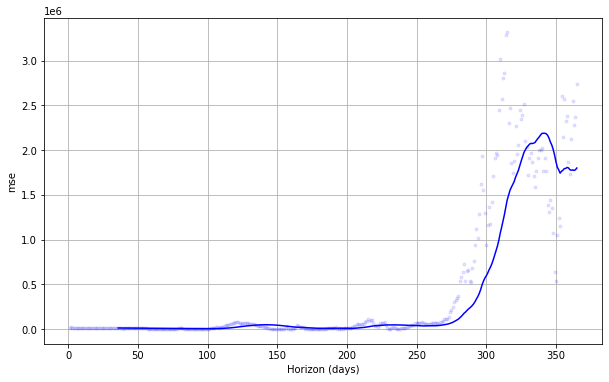

In [105]:
# mean squared error
fig = plot_cross_validation_metric(df_cv, metric='mse')